In [10]:
import pandas as pd
import re

import time

Done:
- Scraping reddit to CSV
- CSV to Pandas Dataframe


- Run SentimentGrapher on Dataframe
- Run WordCounter on Dataframe



ToDo:
- (Put DataframeExtractor in AnalysisClass instead of outside loop?)
- Make DataframeExtractor column_value accept regex queries rather than just a value - DONE 
- Modify EmbeddingComparer to see most quintessential wordcounts (and not replicate Scattertext?)


### Scraping Reddit

In [6]:
subs = ["worldpolitics", "anime_titties"]
#maxs = 1000 # I LITERALLY TRIED FOR HOURS TO HAVE THIS NOT HARD CODED DEAR GOD PLEASE HELP ME #TODO

In [7]:
# %run scripts/Submissions_edit.py 
# %run scripts/Comments_edit.py

# #submissioninit(subs)
# #commentsinit(subs)

In [8]:
# %run scripts/Submissions_edit.py 25000
# %run scripts/Comments_edit.py 2000

# submissioninit(subs)
# #commentsinit(subs)

Max submissions set to 25000
Downloading: worldpolitics
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500 submissions
Downloading: 500

In [9]:

%run scripts/Comments_edit.py 2000
commentsinit(subs)

Downloading: worldpolitics
Downloading: 500 comments
Downloading: 500 comments
Downloading: 500 comments
Downloading: 500 comments
Downloading: 500 comments
Downloading: 500 comments
Downloading: 500 comments
Downloading: 500 comments
Downloading: 500 comments
Downloading: 500 comments
Download complete.
Downloading: anime_titties
Downloading: 500 comments
Downloading: 500 comments
Downloading: 500 comments
Downloading: 500 comments
Downloading: 500 comments
Downloading: 500 comments
Downloading: 500 comments
Downloading: 500 comments
Downloading: 500 comments
Downloading: 500 comments
Download complete.


In [18]:
%run code/AnalysisClasses.py

def CSVtoDF(subreddit, contenttype):
    submissions = pd.read_csv("csvs/" + subreddit + "-submissions.csv") 
    comments = pd.read_csv("csvs/" + subreddit + "-comments.csv")
    if contenttype == 'comments':
        return comments
    if contenttype == 'submissions':
        return submissions

In [19]:
worldpolitics_submissions = CSVtoDF('worldpolitics', 'submissions')
worldpolitics_comments = CSVtoDF('worldpolitics', 'comments')
anime_titties_submissions = CSVtoDF('anime_titties', 'submissions')
anime_titties_comments = CSVtoDF('anime_titties', 'comments')

In [20]:
print(worldpolitics_comments)


                 datetime               author  \
0     2020-07-02 12:39:21             jackst10   
1     2020-07-02 12:35:37         ExplosiveRox   
2     2020-07-02 12:34:45  bondrewd-lord-of-ew   
3     2020-07-02 12:31:15       Butterferret12   
4     2020-07-02 12:28:34        MAGIC_EYE_BOT   
...                   ...                  ...   
4995  2020-06-29 20:11:26                krawm   
4996  2020-06-29 20:11:02           Gnome_Sane   
4997  2020-06-29 20:10:52  thisismyusername_98   
4998  2020-06-29 20:10:00                krawm   
4999  2020-06-29 20:09:58         Leevilstoeoe   

                                                   body  
0                                            Niet blyat  
1                                                  nice  
2                                           Begone THOT  
3                                     The true centrist  
4     This post has been automatically removed becau...  
...                                                

In [34]:
%run code/AnalysisClasses.py
worldpolitics_comments = AnalysisClasses.DateFilterADF(dataframe=worldpolitics_comments, min_date="2020-07-02 00:00:00")

min date is time.struct_time(tm_year=2020, tm_mon=7, tm_mday=2, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=3, tm_yday=184, tm_isdst=-1)
killing rows []


In [35]:
print(worldpolitics_comments)

                datetime               author  \
0    2020-07-02 12:39:21             jackst10   
1    2020-07-02 12:35:37         ExplosiveRox   
2    2020-07-02 12:34:45  bondrewd-lord-of-ew   
3    2020-07-02 12:31:15       Butterferret12   
4    2020-07-02 12:28:34        MAGIC_EYE_BOT   
..                   ...                  ...   
692  2020-07-02 00:04:50              hrothni   
693  2020-07-02 00:03:54        myriclisselle   
694  2020-07-02 00:01:51             FosterRI   
695  2020-07-02 00:00:52            [deleted]   
696  2020-07-02 00:00:17      WinterNeoQuartz   

                                                  body  
0                                           Niet blyat  
1                                                 nice  
2                                          Begone THOT  
3                                    The true centrist  
4    This post has been automatically removed becau...  
..                                                 ...  
692         

### Analyzing reddit

#### Selecting a column + column value

In [14]:
%run code/AnalysisClasses.py

#AutoModerator = DataframeExtractor(worldpolitics_comments, 'author', ['AutoModerator'])
#AutoModerator = DataframeExtractor(worldpolitics_comments, 'author', ['AutoModerator'], textonly="yes")
multipleauthors = DataframeExtractor(dataframe=worldpolitics_comments, column='author', columnvalue=['AutoModerator', 'LordJohnStark', 'PrimalMusk'])
print(multipleauthors)

#wp_com_2020 = AnalysisClasses.DataframeExtractor(worldpolitics_comments, 'datetime') # TODO filter for time etc

                 datetime         author  \
3     2020-06-25 19:37:48  LordJohnStark   
30    2020-06-25 19:11:14  AutoModerator   
780   2020-06-25 07:23:04  AutoModerator   
782   2020-06-25 07:17:10  AutoModerator   
861   2020-06-25 06:05:41  AutoModerator   
2477  2020-06-24 12:18:19  AutoModerator   
3010  2020-06-24 04:47:58  AutoModerator   
3498  2020-06-23 21:53:09  AutoModerator   
3995  2020-06-23 16:09:59  AutoModerator   
4095  2020-06-23 14:08:02     PrimalMusk   
4766  2020-06-23 00:44:15  AutoModerator   
4995  2020-06-22 21:43:20  AutoModerator   
4996  2020-06-22 21:43:13     PrimalMusk   

                                                   body  
3     Yeah i was like,   wtf this has nothing to do ...  
30    We do not currently accept submissions from ne...  
780   We do not currently accept submissions from ne...  
782   We do not currently accept submissions from ne...  
861   We do not currently accept submissions from ne...  
2477  We do not currently accept su

#### Integrating that with Sentiment Analysis

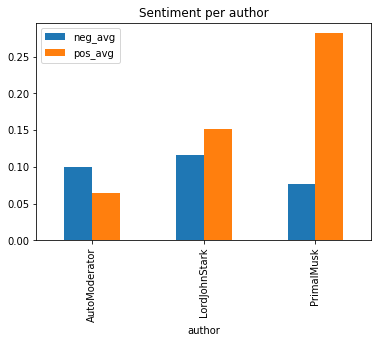

<Figure size 432x288 with 0 Axes>

In [15]:
#TODO DataframeExtractor in same class?
%run code/AnalysisClasses.py

#sen = AnalysisClasses.SentimentGrapher(dataframe=worldpolitics_comments, column='author', column_value=(['AutoModerator', 'LordJohnStark', 'PrimalMusk']))
sen = AnalysisClasses.SentimentGrapher(dataframe=worldpolitics_comments, column='author', column_value=(['AutoModerator', 'LordJohnStark', 'PrimalMusk']), plotname='plots/sentiment_author_trial', plotkind='bar')
#print(sen)

In [37]:
worldpolitics_comments_20200702 = AnalysisClasses.DateFilterADF(dataframe=worldpolitics_comments, min_date="2020-07-02 00:00:00")

start = time.strptime(our_date, "%Y-%m-%d %H:%M:%S" )
week_start_day = int( ( time.tm_yday - time.tm_wday ) / 7 )
time.tm_yday = week_start_day * 7
time.tm_wday = 0
end = time(start)
end = end.timedelta(days=7)

min date is time.struct_time(tm_year=2020, tm_mon=7, tm_mday=2, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=3, tm_yday=184, tm_isdst=-1)
killing rows []


In [43]:
today = datetime.today()
print(today)

from datetime import timedelta
intwoweeks = today + timedelta(weeks=2)
print(intwoweeks)
#today_week = today.timedelta(weeks)

twoweekdifference = 


2020-07-02 13:52:46.127530
2020-07-16 13:52:46.127530


min date is time.struct_time(tm_year=2019, tm_mon=7, tm_mday=2, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=1, tm_yday=183, tm_isdst=-1)


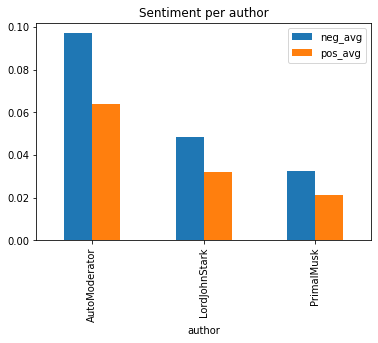

          author   neg_avg   neu_avg   pos_avg
0  AutoModerator  0.097000  0.838000  0.064000
0  LordJohnStark  0.048500  0.419000  0.032000
0     PrimalMusk  0.032333  0.279333  0.021333


<Figure size 432x288 with 0 Axes>

In [59]:
%run code/AnalysisClasses.py
sen = AnalysisClasses.SentimentGrapher(dataframe=AnalysisClasses.DateFilterADF(worldpolitics_comments,min_date="2019-07-02 00:00:00"), column='author', column_value=(['AutoModerator', 'LordJohnStark', 'PrimalMusk']), plotname='plots/sentiment_author_trial', plotkind='bar')

print(sen)

#### print(anime_titties_comments)

#TODO with regex?
animetittiesovertime = DataframeExtractor(dataframe=anime_titties_comments, column='datetime', columnvalue=['2020'])
print(animetittiesovertime)

#### Wordcount test

In [69]:
%run code/AnalysisClasses.py

animetitties_user_dogmodoga = AnalysisClasses.WordCounter(dataframe=anime_titties_comments, column='author', column_value=['dogmodoga'])
animetitties_user_lonliestmonroni = AnalysisClasses.WordCounter(dataframe=anime_titties_comments, column='author', column_value=['LonliestMonroni'])
print(animetitties_user_lonliestmonroni)
print(animetitties_user_lonliestmonroni["you"])

Counter({'you': 15, 'the': 15, 'i': 9, 'a': 9, 'are': 8, 'white': 8, 'that': 8, 't': 7, 'being': 7, 're': 7, 'they': 7, 'and': 6, 'yeah': 5, 'your': 5, 'it': 5, 'to': 5, 'wrong': 5, 'is': 5, 's': 5, 'be': 5, 'just': 5, 'issue': 5, 'how': 3, 'deleted': 3, 'all': 3, 'my': 3, 'have': 3, 'again': 3, 'some': 3, 'hispanics': 3, 'with': 3, 'm': 3, 'technically': 3, 'if': 3, 'so': 3, 'people': 3, 'but': 3, 'for': 3, 'tell': 2, 'me': 2, 'of': 2, 'll': 2, 'yours': 2, 'because': 2, 'comments': 2, 'still': 2, 'high': 2, 'off': 2, 'own': 2, 'about': 2, 'doesn': 2, 'by': 2, 'thing': 2, 'think': 2, 'good': 2, 'cunt': 2, 'or': 2, 'from': 2, 'this': 2, 'us': 2, '21st': 2, 'century': 2, 'concentration': 2, 'camps': 2, 'detained': 2, 'non': 2, 'say': 2, 'can': 2, 'not': 2, 'semantics': 2, 'african': 2, 'here': 2, 'on': 2, 'many': 1, 'mine': 1, 'those': 1, 'aren': 1, 'now': 1, 'lying': 1, 'go': 1, 'back': 1, 'look': 1, 'there': 1, 'been': 1, 'gas': 1, 'telling': 1, 'someone': 1, 'excuse': 1, 'prick': 1, '

In [70]:
print(animetitties_user_dogmodoga - animetitties_user_lonliestmonroni)

Counter({'were': 5, 'british': 4, 'in': 4, 'like': 3, 'mean': 2, 'when': 2, 'vote': 2, 'do': 2, 'was': 2, 'of': 2, 'hong': 2, 'kong': 2, 'their': 2, 'gt': 2, 'treated': 1, 'second': 1, 'citizens': 1, 'couldn': 1, 'until': 1, 'the': 1, '80s': 1, 'allowed': 1, 'hand': 1, 'back': 1, 'even': 1, 'then': 1, 'able': 1, 'governor': 1, 'appointed': 1, 'by': 1, 'widespread': 1, 'demonstrations': 1, 'protests': 1, 'rule': 1, 'colony': 1, 'led': 1, 'wing': 1, 'groups': 1, 'trade': 1, 'unions': 1, 'these': 1, 'put': 1, 'down': 1, 'very': 1, 'violently': 1, 'colonial': 1, 'forces': 1, 'pleased': 1, 'performance': 1, 'police': 1, 'queen': 1, 'elizabeth': 1, 'ii': 1, 'granted': 1, 'force': 1, 'privilege': 1, 'using': 1, 'royal': 1, 'name': 1, 'downvoting': 1, 'change': 1, 'fact': 1, 'whitewashing': 1, 'media': 1, 'portrayal': 1, 'situation': 1, '~~england': 1, 'giving': 1, 'china': 1, 'biggest': 1, 'mistake': 1, '20th': 1, '~~': 1, 'miss': 1, 'western': 1, 'imperialism': 1, '1700s': 1, 'keep': 1, 'col

In [71]:
print(animetitties_user_lonliestmonroni - animetitties_user_dogmodoga)

Counter({'you': 13, 'a': 9, 'are': 8, 'white': 8, 'i': 7, 'being': 7, 're': 7, 'that': 7, 'yeah': 5, 't': 5, 'your': 5, 'wrong': 5, 'is': 5, 's': 5, 'just': 5, 'issue': 5, 'they': 5, 'be': 4, 'how': 3, 'deleted': 3, 'have': 3, 'again': 3, 'some': 3, 'hispanics': 3, 'it': 3, 'm': 3, 'technically': 3, 'if': 3, 'people': 3, 'but': 3, 'tell': 2, 'me': 2, 'll': 2, 'yours': 2, 'comments': 2, 'all': 2, 'my': 2, 'high': 2, 'off': 2, 'own': 2, 'doesn': 2, 'with': 2, 'thing': 2, 'think': 2, 'good': 2, 'cunt': 2, 'from': 2, 'this': 2, 'us': 2, '21st': 2, 'concentration': 2, 'camps': 2, 'detained': 2, 'non': 2, 'say': 2, 'for': 2, 'semantics': 2, 'african': 2, 'here': 2, 'on': 2, 'many': 1, 'mine': 1, 'and': 1, 'those': 1, 'aren': 1, 'now': 1, 'lying': 1, 'go': 1, 'look': 1, 'still': 1, 'gas': 1, 'telling': 1, 'someone': 1, 'about': 1, 'excuse': 1, 'prick': 1, 'fuck': 1, 'does': 1, 'really': 1, 'matter': 1, 'seriously': 1, 'contributing': 1, 'to': 1, 'society': 1, 'facts': 1, 'self': 1, 'righteous

In [94]:
def IntersectionalDifferences(a,b):
    
    def SortByFrequency(i):
        return(a[i]-b[i])
    
    def SortByUsageOfA(i):
        return(a[i])
    
    intersection = set(a).intersection(set(b))
    intersection_list = list(intersection)
    #intersection_list.sort(key=SortByUsageOfA,reverse=True)
    intersection_list.sort(key=SortByFrequency,reverse=True)
    
    for key in intersection_list:
        print("{:15s}: user_a={:3}, user_b={:3} (difference:{:2})".format(key,a[key],b[key],SortByFrequency(key)))
                           
IntersectionalDifferences(animetitties_user_dogmodoga,animetitties_user_lonliestmonroni)                  

in             : user_a=  5, user_b=  1 (difference: 4)
of             : user_a=  4, user_b=  2 (difference: 2)
by             : user_a=  3, user_b=  2 (difference: 1)
the            : user_a= 16, user_b= 15 (difference: 1)
back           : user_a=  2, user_b=  1 (difference: 1)
won            : user_a=  1, user_b=  1 (difference: 0)
where          : user_a=  1, user_b=  1 (difference: 0)
there          : user_a=  1, user_b=  1 (difference: 0)
class          : user_a=  1, user_b=  1 (difference: 0)
because        : user_a=  2, user_b=  2 (difference: 0)
against        : user_a=  1, user_b=  1 (difference: 0)
doing          : user_a=  1, user_b=  1 (difference: 0)
been           : user_a=  1, user_b=  1 (difference: 0)
has            : user_a=  1, user_b=  1 (difference: 0)
as             : user_a=  1, user_b=  1 (difference: 0)
only           : user_a=  1, user_b=  1 (difference: 0)
left           : user_a=  1, user_b=  1 (difference: 0)
to             : user_a=  4, user_b=  5 (differe

In [110]:
def Differences(a,b):
    
    def SortByFrequency(i):
        try:
            return(a[i]-b[i])
        except e:
            return 0
    
    def SortByUsageOfA(i):
        return(a[i])
    
    difference = set(a).difference(set(b))
    difference_list = list(difference)
    
    AButNotBPlusAAndB = (difference_list + intersection_list)
    AButNotBPlusAAndB.sort(key=SortByFrequency,reverse=True)

    for key in AButNotBPlusAAndB:
        print("{:15s}: user_a={:3}, user_b={:3} (difference:{:2})".format(key,a[key],b[key],SortByFrequency(key)))
                           
Differences(animetitties_user_dogmodoga,animetitties_user_lonliestmonroni)

were           : user_a=  5, user_b=  0 (difference: 5)
british        : user_a=  4, user_b=  0 (difference: 4)
in             : user_a=  5, user_b=  1 (difference: 4)
like           : user_a=  3, user_b=  0 (difference: 3)
do             : user_a=  2, user_b=  0 (difference: 2)
gt             : user_a=  2, user_b=  0 (difference: 2)
hong           : user_a=  2, user_b=  0 (difference: 2)
mean           : user_a=  2, user_b=  0 (difference: 2)
their          : user_a=  2, user_b=  0 (difference: 2)
when           : user_a=  2, user_b=  0 (difference: 2)
kong           : user_a=  2, user_b=  0 (difference: 2)
vote           : user_a=  2, user_b=  0 (difference: 2)
was            : user_a=  2, user_b=  0 (difference: 2)
of             : user_a=  4, user_b=  2 (difference: 2)
china          : user_a=  1, user_b=  0 (difference: 1)
unions         : user_a=  1, user_b=  0 (difference: 1)
giving         : user_a=  1, user_b=  0 (difference: 1)
even           : user_a=  1, user_b=  0 (differe

In [112]:
def UnionDifferences(a,b):
    
    def SortByFrequency(i):
        return(a[i]-b[i])
    
    def SortByUsageOfA(i):
        return(a[i])
    
    union = set(a).union(set(b))
    union_list = list(union)
    #intersection_list.sort(key=SortByUsageOfA,reverse=True)
    union_list.sort(key=SortByFrequency,reverse=True)
    
    for key in union_list:
        print("{:15s}: user_a={:3}, user_b={:3} (difference:{:2})".format(key,a[key],b[key],SortByFrequency(key)))

UnionDifferences(animetitties_user_dogmodoga,animetitties_user_lonliestmonroni)                  

were           : user_a=  5, user_b=  0 (difference: 5)
british        : user_a=  4, user_b=  0 (difference: 4)
in             : user_a=  5, user_b=  1 (difference: 4)
like           : user_a=  3, user_b=  0 (difference: 3)
gt             : user_a=  2, user_b=  0 (difference: 2)
vote           : user_a=  2, user_b=  0 (difference: 2)
do             : user_a=  2, user_b=  0 (difference: 2)
hong           : user_a=  2, user_b=  0 (difference: 2)
of             : user_a=  4, user_b=  2 (difference: 2)
mean           : user_a=  2, user_b=  0 (difference: 2)
was            : user_a=  2, user_b=  0 (difference: 2)
their          : user_a=  2, user_b=  0 (difference: 2)
when           : user_a=  2, user_b=  0 (difference: 2)
kong           : user_a=  2, user_b=  0 (difference: 2)
china          : user_a=  1, user_b=  0 (difference: 1)
land           : user_a=  1, user_b=  0 (difference: 1)
queen          : user_a=  1, user_b=  0 (difference: 1)
even           : user_a=  1, user_b=  0 (differe

#### Wordcount comparer

In [ ]:
# TODO
"""see AnalysisClasses.EmbeddingComparer and modify"""
